In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # default 3/4 train split, selection is random!

In [4]:
num_trees = 14
l_rate = 0.8

regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=num_trees,  # number of trees
    learning_rate=l_rate  # lower -> need more trees
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.8, max_depth=2, n_estimators=14)

In [5]:
# staged_predict to measure the validation error in each stage, to find optimal # trees
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_num_trees = np.argmin(errors)
#print(errors)
print(best_num_trees)

5


In [6]:
# build and fit model with optimal number of trees
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_num_trees, # seems correct, no need +1, since the 1st element of errors[] changes
    learning_rate=l_rate            # when adjusting the learning rate -> it's the first "real" tree
)
best_regressor.fit(X_train, y_train)

# evaluate performance
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.929331914311076

Text(0, 0.5, 'Deviance')

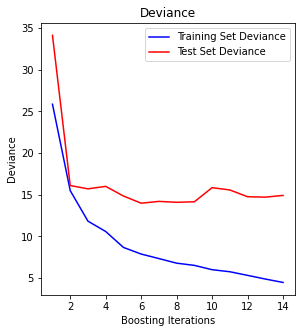

In [7]:
# Bonus: show with plot that this was indeed the best
test_score = np.zeros((num_trees), dtype=np.float64)
for i, y_pred in enumerate(regressor.staged_predict(X_test)):
    test_score[i] = regressor.loss_(y_test, y_pred)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Deviance')        # ▼ +1 because the GB init/average counts as a boosting iteration I guess
plt.plot(np.arange(num_trees) + 1, regressor.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(num_trees) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')